<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: float32(785)
memory usage: 1.1 GB
Epoch 1/3
9312/9312 [==============================] - 129s 14ms/step - loss: 0.0014 - accuracy: 0.9999 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/3
9312/9312 [==============================] - 123s 13ms/step - loss: 3.2007e-12 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/3
2328/2328 [==============================] - 13s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Test Accuracy: 100.00%


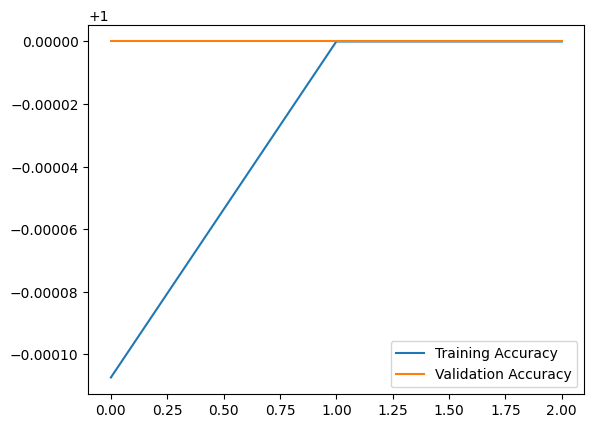

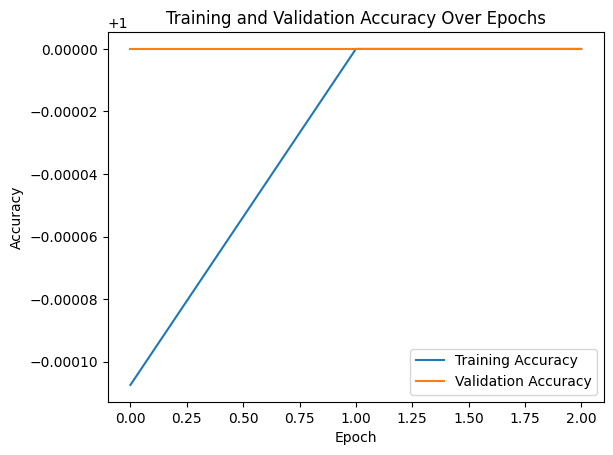

NameError: name 'x_val' is not defined

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.utils import to_categorical 
from keras.models import Sequential 
import tensorflow as tf

from keras.models import Sequential 
import tensorflow as tf
from keras.layers import Conv2D, Dense, MaxPooling2D


from keras.layers import Dense

from keras.layers import Flatten
data = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')
data.head(5)
dataframe=pd.DataFrame(data)
dataframe.shape
dataframe.info()
dataframe.describe()
dataframe.isnull().sum()
x = dataframe.drop('0', axis=1)
y = dataframe['0']

# Normalize pixel values
x = x / 255.0
y = y / 255.0



x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train = x_train.values.reshape(-1, 28, 28, 1)
x_test = x_test.values.reshape(-1, 28, 28, 1)
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=26)
y_test = to_categorical(y_test, num_classes=26)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(26, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Use y_train and y_test directly without one-hot encoding
history = model.fit(x_train, to_categorical(y_train, num_classes=26), epochs=3, validation_data=(x_test, to_categorical(y_test, num_classes=26)))

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()
import numpy as np
import pandas as pd
import cv2
from keras.models import load_model
from tkinter import *
from PIL import Image, ImageDraw
from keras.models import Sequential
from keras.layers import Dense

# Example model architecture
model = Sequential()
model.add(Dense(64, input_shape=(784,), activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model (replace this with your actual training data)
model.fit(x_train, y_train, epochs=3, batch_size=32, validation_data=(x_val, y_val))

# Save the model to a file
model.save('your_model.h5')




# Load the pre-trained model for character recognition
model = load_model('your_model.h5')

# Function to preprocess and predict the drawn image
def predict_image():
    # Get the drawn image from the canvas
    img = cv2.resize(cv2.cvtColor(np.array(canvas_image), cv2.COLOR_BGR2GRAY), (28, 28))
    
    # Normalize pixel values
    img = img / 255.0
    
    # Flatten the image
    img_flat = img.flatten()
    
    # Reshape for model input
    img_flat = img_flat.reshape(1, 28, 28, 1)

    
    # Make prediction
    probabilities = model.predict(img_flat)
    
    # Get the predicted class (index with the highest probability)
    predicted_class = np.argmax(probabilities)
    
    # Display the prediction
    result_label.config(text=f"Prediction: {chr(predicted_class + 65)}")
# Save the model in native Keras format
model.save('your_model.keras')
# Load the pre-trained model for character recognition
model = load_model('your_model.h5')




# Function to clear the canvas
def clear_canvas():
    canvas.delete("all")
    result_label.config(text="Prediction: ")

# GUI Setup
root = Tk()
root.title("Handwritten Character Recognition")

# Create a canvas for drawing
canvas = Canvas(root, width=200, height=200, bg="white")
canvas.pack()

# Create an image for drawing
canvas_image = Image.new("RGB", (200, 200), "white")
draw = ImageDraw.Draw(canvas_image)

# Buttons
predict_button = Button(root, text="Predict", command=predict_image)
predict_button.pack()

clear_button = Button(root, text="Clear", command=clear_canvas)
clear_button.pack()

# Label for prediction result
result_label = Label(root, text="Prediction: ")
result_label.pack()

# Function to handle mouse events for drawing
def paint(event):
    x1, y1 = (event.x - 1), (event.y - 1)
    x2, y2 = (event.x + 1), (event.y + 1)
    canvas.create_oval(x1, y1, x2, y2, fill="black", width=5)
    draw.line([x1, y1, x2, y2], fill="black", width=5)

canvas.bind("<B1-Motion>", paint)

root.mainloop()



